In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report

import tensorflow as tf
import tensorflow.keras.layers as tfl
import tensorflow.keras.models as tfm 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape


(60000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255

In [5]:
 x_train.shape


(60000, 28, 28, 1)

In [6]:
def leNet5(input_shape , num_of_labels):
    model = tfm.Sequential()
    
    model.add(tfl.Conv2D(6, (5, 5), activation='tanh', input_shape=input_shape))
    model.add(tfl.AvgPool2D((2,2) , strides=2))
    
    model.add(tfl.Conv2D(16 , (5,5) , activation='tanh'))          
    model.add(tfl.AvgPool2D((2,2) , strides=2))
    
    model.add(tfl.Flatten())
    
    model.add(tfl.Dense(120 , activation='tanh'))
    model.add(tfl.Dense(84 , activation='tanh'))
    
    model.add(tfl.Dense(num_of_labels , activation='softmax'))            
    return model

In [7]:
mnist_model = leNet5(input_shape=x_train[0].shape , num_of_labels=len(np.unique(y_train)))
mnist_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

mnist_model.fit(x_train, y_train, epochs=10 , batch_size = 64)

Epoch 1/10
938/938 [==============================] - 16s 16ms/step - loss: 0.2839 - accuracy: 0.9170
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1026 - accuracy: 0.9692
Epoch 3/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0688 - accuracy: 0.9789
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0412 - accuracy: 0.9868
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0334 - accuracy: 0.9894
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0290 - accuracy: 0.9906
Epoch 8/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 9/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0210 - accuracy: 0.9932
Epoch 10/10
938/938 [==============================] - 15s 16ms/step - loss: 0.017

In [8]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [9]:
y_test_pred = np.argmax(mnist_model.predict(x_test) , axis=1)


313/313 [==============================] - 2s 5ms/step


<Axes: >

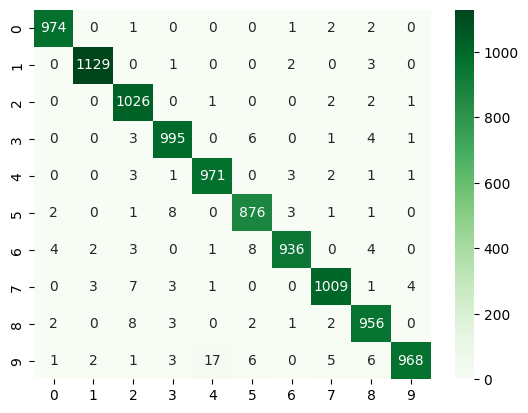

In [10]:
convmat = confusion_matrix(y_test , y_test_pred)
sns.heatmap(convmat , annot=True , fmt='d',cmap = 'Greens')

In [11]:
print(classification_report(y_test , y_test_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [12]:
(x_train2, y_train2), (x_test2, y_test2) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [13]:
x_train2.shape


(60000, 28, 28)

In [14]:
x_train2 = x_train2.reshape(x_train2.shape[0], 28, 28, 1)
x_test2 = x_test2.reshape(x_test2.shape[0], 28, 28, 1)
x_train2 = x_train2.astype('float')
x_test2 = x_test2.astype('float')
x_train2 /= 255
x_test2 /= 255

In [15]:
y_train2


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
fashion_model = leNet5(input_shape=x_train2[0].shape , num_of_labels=len(np.unique(y_train2)))
fashion_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

fashion_model.fit(x_train2, y_train2, epochs=10 , batch_size = 64)

Epoch 1/10
938/938 [==============================] - 16s 16ms/step - loss: 0.6184 - accuracy: 0.7707
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.4343 - accuracy: 0.8409
Epoch 3/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3805 - accuracy: 0.8612
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3501 - accuracy: 0.8709
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3305 - accuracy: 0.8782
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3109 - accuracy: 0.8845
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2962 - accuracy: 0.8897
Epoch 8/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2852 - accuracy: 0.8946
Epoch 9/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2727 - accuracy: 0.8981
Epoch 10/10
938/938 [==============================] - 15s 16ms/step - loss: 0.262

In [17]:
fashion_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [18]:
y_test2_pred = np.argmax(fashion_model.predict(x_test2) , axis=1)


313/313 [==============================] - 2s 5ms/step


<Axes: >

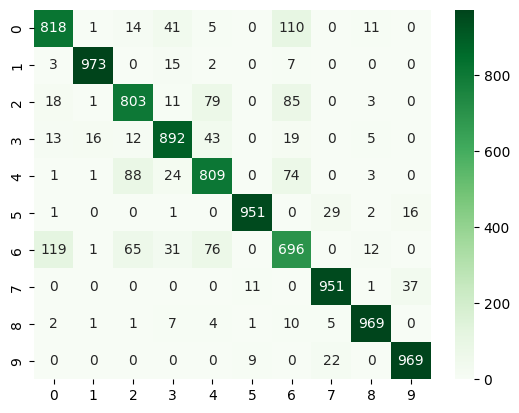

In [19]:
convmat2 = confusion_matrix(y_test2 , y_test2_pred)
sns.heatmap(convmat2 , annot=True , fmt='d',cmap = 'Greens')

In [20]:
print(classification_report(y_test2 , y_test2_pred))


              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.82      0.80      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.79      0.81      0.80      1000
           5       0.98      0.95      0.96      1000
           6       0.70      0.70      0.70      1000
           7       0.94      0.95      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

